In [49]:
import cv2 
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2

train_images = pd.read_pickle('train_images.pkl')
train_labels = pd.read_csv('train_labels.csv')


img_idx = 100
img = train_images[img_idx]
img = img.astype('uint8')

In [50]:
blur = cv2.medianBlur(img,1)
thresh = cv2.inRange(blur, 220, 255)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2:]
sorted_contours = sorted(contours, key=lambda c: cv2.arcLength(c,True), reverse=True)

Id          100
Category      5
Name: 100, dtype: int64

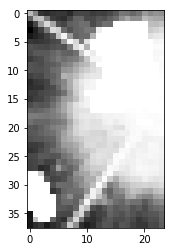

In [51]:
x,y,w,h = cv2.boundingRect(sorted_contours[0])


digit = img[y:y+h,x:x+w]

plt.figure(),plt.imshow(digit,cmap='gray')
train_labels.iloc[img_idx, :]